In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import re
from datetime import datetime
import pandas as pd

from echolalia.parser import WhatsAppParser
# from echolalia.contextualizer import Contextualizer

In [3]:
parser = WhatsAppParser()

S3_BUCKET_NAME = "smcphers-echolalia"
CHAT_LOG_FILENAME = "data/Cat_WhatsApp.txt"

# Parse the chat log into dicts and then into a DataFrame
messages = parser.parse_chat_log(bucket=S3_BUCKET_NAME, chat_log_filename=CHAT_LOG_FILENAME)

In [4]:
messages

,user,timestamp,message,num_messages
0,Selwyn-Lloyd McPherson,[2022-01-17 23:15:56],Hello?!,1
1,Cat,"[2022-01-17 23:16:26, 2022-01-17 23:17:24]",HI oh good i do have it on my computer already,2
2,Selwyn-Lloyd McPherson,"[2022-01-17 23:17:24, 2022-01-17 23:19:56]",Success! Ooh pictures work!,2
3,Cat,"[2022-01-17 23:20:17, 2022-01-17 23:20:40]",yes! can you see this?,2
4,Selwyn-Lloyd McPherson,"[2022-01-17 23:21:12, 2022-01-17 23:21:18]",Oh! Haha the image that comes up is so random,2
...,...,...,...,...
27794,Selwyn-Lloyd McPherson,"[2024-08-01 03:51:47, 2024-08-01 03:52:26]",Count that shit up Minus a few for laundry,2
27795,Cat,"[2024-08-01 03:57:17, 2024-08-01 04:19:50]",About a dollar of Uzbek money Yeah lol,2
27796,Selwyn-Lloyd McPherson,"[2024-08-01 04:33:09, 2024-08-01 04:33:18, 202...",I just called al Italia airlines to see what k...,12
27797,Cat,"[2024-08-01 16:30:04, 2024-08-04 17:06:35, 202...",Omg I randomly have the worst cough now jfc ha...,7


## Median time diff

Looks like almost always within hours / one day. Only extreme was nine days. . .? (800000 seconds in days =  9.26 days)

In [50]:
from echolalia._utils import median_diff

In [56]:
messages_combined

,group,user,timestamp,message,num_messages,chatline,median_diff
0,2,Cat,"[[2022-01-17 23:16:26, 2022-01-17 23:17:24]]",HI oh good i do have it on my computer already,1,"[1/17/22, 11:16:26 PM] Cat: HI. [1/17/22, 11:1...",0 days 00:00:58
1,3,Selwyn-Lloyd McPherson,"[[2022-01-17 23:17:24, 2022-01-17 23:19:56]]",Success! Ooh pictures work!,1,"[1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:...",0 days 00:02:32
2,4,Cat,"[[2022-01-17 23:20:17, 2022-01-17 23:20:40]]",yes! can you see this?,1,"[1/17/22, 11:20:17 PM] Cat: yes!. [1/17/22, 11...",0 days 00:00:23
3,5,Selwyn-Lloyd McPherson,"[[2022-01-17 23:21:12, 2022-01-17 23:21:18]]",Oh! Haha the image that comes up is so random,1,"[1/17/22, 11:21:12 PM] Selwyn-Lloyd McPherson:...",0 days 00:00:06
4,6,Cat,[[2022-01-17 23:21:37]],i know lol a friend of mine made me a header f...,1,"[1/17/22, 11:21:37 PM] Cat: i know lol a frien...",0 days 00:00:00
...,...,...,...,...,...,...,...
27793,27795,Selwyn-Lloyd McPherson,"[[2024-08-01 03:51:47, 2024-08-01 03:52:26]]",Count that shit up Minus a few for laundry,1,"[8/1/24, 3:51:47 AM] Selwyn-Lloyd McPherson: C...",0 days 00:00:39
27794,27796,Cat,"[[2024-08-01 03:57:17, 2024-08-01 04:19:50]]",About a dollar of Uzbek money Yeah lol,1,"[8/1/24, 3:57:17 AM] Cat: About a dollar of Uz...",0 days 00:22:33
27795,27797,Selwyn-Lloyd McPherson,"[[2024-08-01 04:33:09, 2024-08-01 04:33:18, 20...",I just called al Italia airlines to see what k...,1,"[8/1/24, 4:33:09 AM] Selwyn-Lloyd McPherson: I...",0 days 00:01:30
27796,27798,Cat,"[[2024-08-01 16:30:04, 2024-08-04 17:06:35, 20...",Omg I randomly have the worst cough now jfc ha...,1,"[8/1/24, 4:30:04 PM] Cat: Omg I randomly have ...",1 days 22:03:19.500000


In [74]:
messages_combined['time_diff_seconds'] = messages_combined['median_diff'].dt.total_seconds()
messages_combined

,group,user,timestamp,message,num_messages,chatline,median_diff,time_diff_seconds
0,2,Cat,"[[2022-01-17 23:16:26, 2022-01-17 23:17:24]]",HI oh good i do have it on my computer already,1,"[1/17/22, 11:16:26 PM] Cat: HI. [1/17/22, 11:1...",0 days 00:00:58,58.0
1,3,Selwyn-Lloyd McPherson,"[[2022-01-17 23:17:24, 2022-01-17 23:19:56]]",Success! Ooh pictures work!,1,"[1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:...",0 days 00:02:32,152.0
2,4,Cat,"[[2022-01-17 23:20:17, 2022-01-17 23:20:40]]",yes! can you see this?,1,"[1/17/22, 11:20:17 PM] Cat: yes!. [1/17/22, 11...",0 days 00:00:23,23.0
3,5,Selwyn-Lloyd McPherson,"[[2022-01-17 23:21:12, 2022-01-17 23:21:18]]",Oh! Haha the image that comes up is so random,1,"[1/17/22, 11:21:12 PM] Selwyn-Lloyd McPherson:...",0 days 00:00:06,6.0
4,6,Cat,[[2022-01-17 23:21:37]],i know lol a friend of mine made me a header f...,1,"[1/17/22, 11:21:37 PM] Cat: i know lol a frien...",0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...
27793,27795,Selwyn-Lloyd McPherson,"[[2024-08-01 03:51:47, 2024-08-01 03:52:26]]",Count that shit up Minus a few for laundry,1,"[8/1/24, 3:51:47 AM] Selwyn-Lloyd McPherson: C...",0 days 00:00:39,39.0
27794,27796,Cat,"[[2024-08-01 03:57:17, 2024-08-01 04:19:50]]",About a dollar of Uzbek money Yeah lol,1,"[8/1/24, 3:57:17 AM] Cat: About a dollar of Uz...",0 days 00:22:33,1353.0
27795,27797,Selwyn-Lloyd McPherson,"[[2024-08-01 04:33:09, 2024-08-01 04:33:18, 20...",I just called al Italia airlines to see what k...,1,"[8/1/24, 4:33:09 AM] Selwyn-Lloyd McPherson: I...",0 days 00:01:30,90.0
27796,27798,Cat,"[[2024-08-01 16:30:04, 2024-08-04 17:06:35, 20...",Omg I randomly have the worst cough now jfc ha...,1,"[8/1/24, 4:30:04 PM] Cat: Omg I randomly have ...",1 days 22:03:19.500000,165799.5


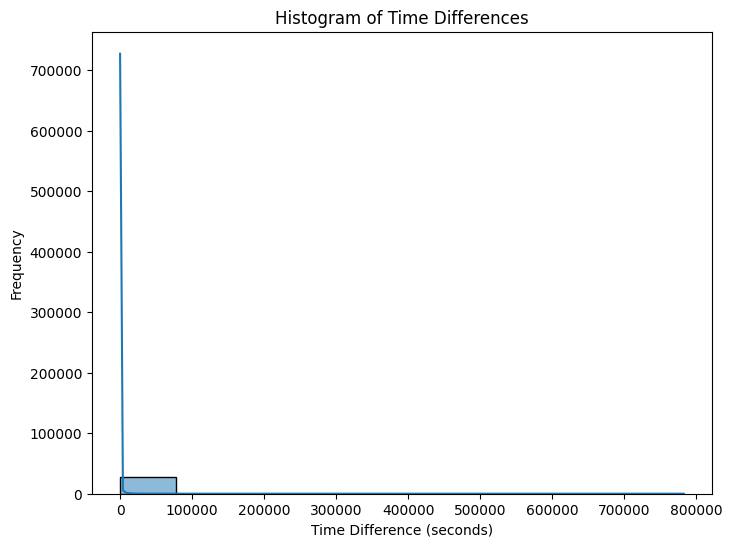

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(messages_combined['time_diff_seconds'], bins=10, kde=True)
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()

#### IMessage

In [119]:
from echolalia.parser import iMessageParser

im_parser = iMessageParser()

S3_BUCKET_NAME = "smcphers-echolalia"
CHAT_LOG_FILENAME = "data/Cat_iMessage.txt"

# Parse the chat log into dicts and then into a DataFrame
messages = im_parser.parse_chat_log(bucket=S3_BUCKET_NAME, chat_log_filename=CHAT_LOG_FILENAME)

Found it


In [120]:
messages

,user,timestamp,message,num_messages
0,+14156839285,[2023-06-30 16:17:45],Hiii I know I have no right to your attention ...,1
1,Me,"[2023-06-30 23:09:21, 2023-06-30 23:10:40]","Hi Cat, no, there’s no weird idea of rights or...",2
2,+14156839285,[2023-06-30 23:12:13],"I am all right, but I wasn’t Wednesday, and tr...",1
3,Me,[2023-06-30 23:12:44],What happened on Wednesday?,1
4,+14156839285,[2023-06-30 23:14:12],"No clue, similar to what happened in January t...",1
...,...,...,...,...
1644,+14156839285,"[2024-02-05 12:05:20, 2024-02-05 12:07:30]",Other plans were made Thank you for not peeing...,2
1645,Me,[2024-02-05 12:07:49],A princess would never,1
1646,+14156839285,"[2024-02-05 12:08:19, 2024-02-06 11:28:39]",And she did not Pretty,2
1647,Me,"[2024-02-12 13:24:25, 2024-02-12 13:26:36]","Ahh, gorgeous darling Apps be hard",2


In [5]:
target_user = "Cat"
# If the first message is from the target user, it won't be correlated to a previous input, so remove it
if messages.iloc[0]["user"] == target_user:
    messages = messages.iloc[1:]
# If the last message is not from the target user, it won't be correlated to a following output, so remove it
if messages.iloc[-1]["user"] != target_user:
    messages = messages.iloc[:-1]

# Now inputs and outputs are aligned, one row after the other. Join into a single DataFrame
training_data = pd.DataFrame({
    "input": messages[messages["user"] != target_user]["message"].values,
    "output": messages[messages["user"] == target_user]["message"].values
})
training_data


,input,output
0,Hello?!,HI oh good i do have it on my computer already
1,Success! Ooh pictures work!,yes! can you see this?
2,Oh! Haha the image that comes up is so random,i know lol a friend of mine made me a header f...
3,This is a weird format,you might get a kick out of those a hilarious ...
4,Decaying abandoned! How did you know!?,:D if you want to see how adorable i was as a ...
...,...,...
13894,"I wouldn’t know, I haven’t been touched since....",Me either
13895,Yeah. . . You deserve more than that,No I don’t
13896,Well that’s just a difference of opinion I sti...,I have a few quarters in my desk
13897,Count that shit up Minus a few for laundry,About a dollar of Uzbek money Yeah lol


In [12]:
training_data.to_csv("../data/training_data.csv", index=False)

# Sagemaker

In [10]:
import boto3
import sagemaker
import torch
from sagemaker.pytorch import PyTorch
from transformers import Trainer, TrainingArguments, AutoModelForCausalLM, AutoTokenizer

In [7]:
session = sagemaker.Session()
role = 'arn:aws:iam::897729117324:role/service-role/AmazonSageMaker-ExecutionRole-20241013T021028'

In [8]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')

In [9]:
# Set pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize the 'input' column of your DataFrame
training_data['input_ids'] = training_data['input'].apply(lambda x: tokenizer.encode(x, truncation=True, padding='max_length', max_length=512))

# Tokenize the 'output' column similarly
training_data['output_ids'] = training_data['output'].apply(lambda x: tokenizer.encode(x, truncation=True, padding='max_length', max_length=512))

In [11]:
# Convert the 'input_ids' and 'output_ids' columns to lists
input_ids = training_data['input_ids'].tolist()
output_ids = training_data['output_ids'].tolist()

# Convert lists to PyTorch tensors
input_ids_tensor = torch.tensor(input_ids)
output_ids_tensor = torch.tensor(output_ids)

# Ensure both tensors have the same shape for proper input-output pairing
assert input_ids_tensor.shape == output_ids_tensor.shape

In [12]:
from torch.utils.data import Dataset

class ConversationDataset(Dataset):
    def __init__(self, input_ids, output_ids):
        self.input_ids = input_ids
        self.output_ids = output_ids

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'labels': self.output_ids[idx]  # Model needs 'labels' during training
        }

# Instantiate the dataset
dataset = ConversationDataset(input_ids_tensor, output_ids_tensor)

In [13]:
model.resize_token_embeddings(len(tokenizer))

Embedding(50257, 768)

In [15]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',         # Output directory
    num_train_epochs=3,             # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,              # Save checkpoint every 10,000 steps
    save_total_limit=2,             # Limit the total number of checkpoints
    logging_dir='./logs',           # Directory for logs
    logging_steps=500,              # Log every 500 steps
    eval_strategy="steps",    # Evaluate during training
    eval_steps=1000,                # Evaluation interval
    report_to="none"                # No reporting to W&B
)

In [16]:
# Create the Trainer instance
trainer = Trainer(
    model=model,                     # The model to train
    args=training_args,               # Training arguments
    train_dataset=dataset,            # Training dataset
    eval_dataset=dataset,             # You can use a separate dataset for evaluation
)

In [17]:
# Start training
trainer.train()

  0%|          | 0/10425 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  0%|          | 10/10425 [01:39<37:44:26, 13.05s/it]

KeyboardInterrupt: 